In [6]:
import pandas as pd
import os
import init

the_path = init.posdir

the_dir = os.listdir(the_path)
the_dir.sort()
print(the_dir)
rows_list = []
for entry in the_dir:
    dict1 = {}
    the_time = os.path.getmtime(the_path + entry)
    dict1.update({'name': entry, 'time': the_time})
    rows_list.append(dict1)
df  = pd.DataFrame(rows_list)
df.to_csv(init.codedir+'read_times.csv')

['pos_00001.txt', 'pos_00002.txt', 'pos_00003.txt', 'pos_00073.txt', 'pos_00137.txt', 'pos_00143.txt', 'pos_00264.txt', 'pos_00847.txt', 'pos_01045.txt', 'pos_01193.txt', 'pos_02675.txt']


In [7]:
df.describe()
df.info()
df = df.sort_values('name')
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
name    11 non-null object
time    11 non-null float64
dtypes: float64(1), object(1)
memory usage: 256.0+ bytes
            name          time
0  pos_00001.txt  1.520716e+09
1  pos_00002.txt  1.520716e+09
2  pos_00003.txt  1.520716e+09
3  pos_00073.txt  1.520716e+09
4  pos_00137.txt  1.520716e+09


             name          time  norm  normdiff
0   pos_00001.txt  1.520716e+09   0.0       NaN
1   pos_00002.txt  1.520716e+09   7.0       NaN
2   pos_00003.txt  1.520716e+09  14.0       NaN
3   pos_00073.txt  1.520716e+09  21.0       NaN
4   pos_00137.txt  1.520716e+09  27.0       NaN
5   pos_00143.txt  1.520716e+09  33.0       NaN
6   pos_00264.txt  1.520716e+09  40.0       NaN
7   pos_00847.txt  1.520716e+09  61.0       NaN
8   pos_01045.txt  1.520716e+09  54.0       NaN
9   pos_01193.txt  1.520716e+09   0.0       NaN
10  pos_02675.txt  1.520716e+09  46.0       NaN


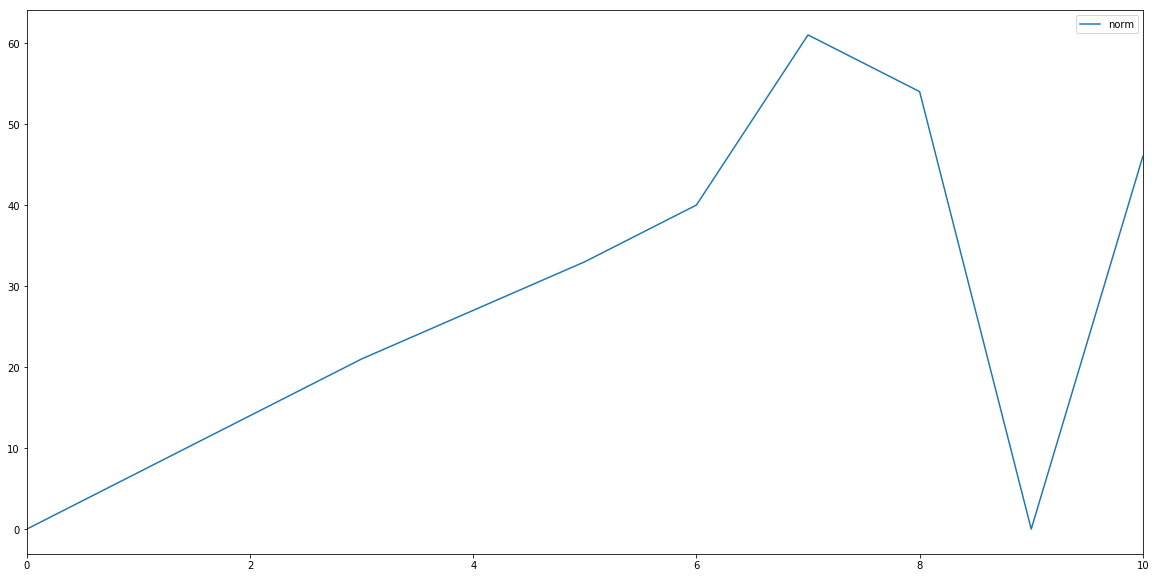

In [8]:
df['norm'] = df['time'] - df.min()[1]
df['normdiff'] = df['norm'] - df['norm'].shift(11)
df.loc[df.normdiff < 0, 'normdiff'] = 0
print(df.head(100))
df.plot(use_index=False, y='norm', figsize=(20,10))

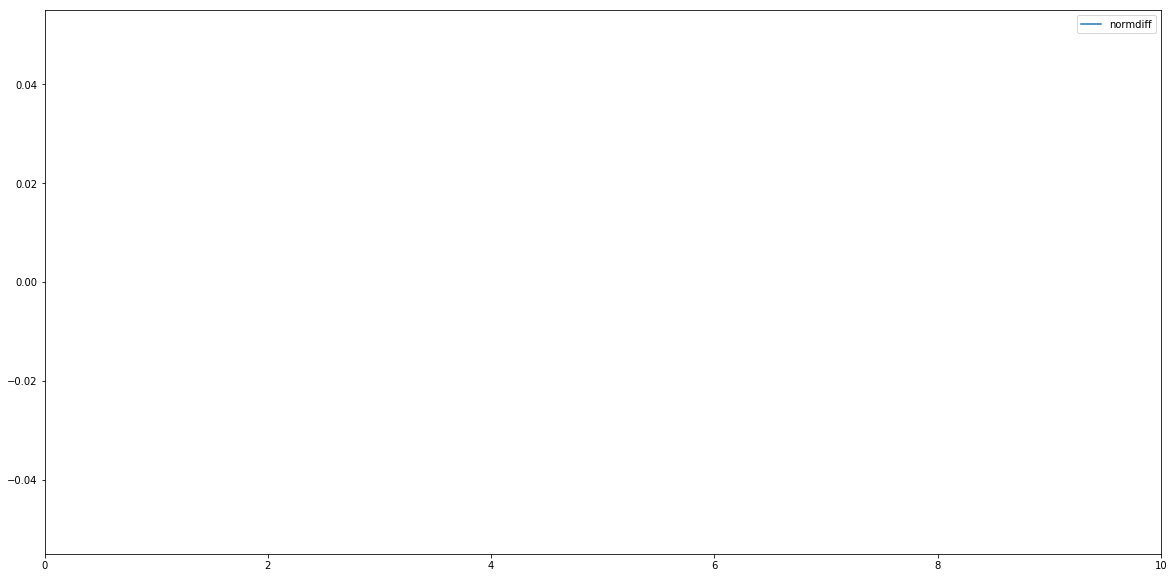

In [9]:
df.plot(use_index=False, y='normdiff', figsize=(20,10))